Key predictors of fraud include
Transaction Type Transaction Amount Originating Account Balance Destination Account Balance Transaction Frequency

These factors make sense because they align with common patterns observed in fraudulent activities.
For example:

Transaction Type: Certain types of transactions (e.g., CASH_OUT, TRANSFER) are more prone to fraud. Transaction Amount: Higher amounts are more likely to be fraudulent. Account Balance: Significant changes in balance can indicate suspicious activity.

Prevention measures include:
Real-time monitoring of transactions Multi-factor authentication Behavioral analytics Regular security audits Employee training on fraud prevention

The effectiveness of these actions can be determined by:
Monitoring the reduction in the number and value of fraudulent transactions. Measuring the false positive rate. Collecting customer feedback on the security measures. Reviewing the results of regular security audits.


In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_id = '1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV'
url = f'https://drive.google.com/uc?id={file_id}&confirm=t'
output = 'Fraud.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&confirm=t
To: /content/Fraud.csv
100%|██████████| 494M/494M [00:06<00:00, 75.2MB/s]


'Fraud.csv'

#**DataSet**

In [ ]:
df= pd.read_csv('Fraud.csv',nrows=100000)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

In [ ]:
print("categorical Columns are : ",categorical_cols)
print("Numerical Columns are :" , numerical_cols)

categorical Columns are :  Index(['type', 'nameOrig', 'nameDest'], dtype='object')
Numerical Columns are : Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [ ]:
df["isFraud"].value_counts()

,count
isFraud,
0,99884
1,116


#**EDA**

<Axes: xlabel='isFraud', ylabel='count'>

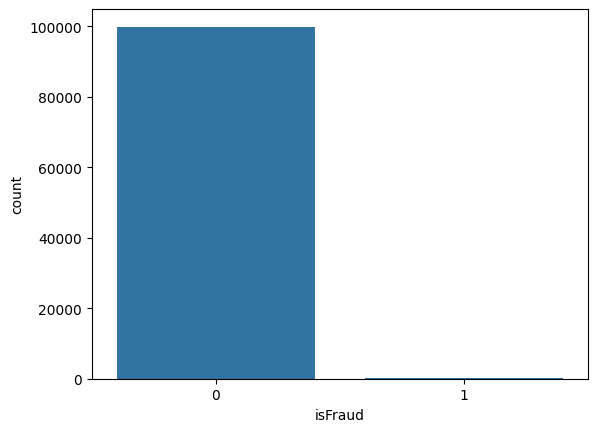

In [ ]:
sns.countplot(x=df["isFraud"])

<Axes: xlabel='amount', ylabel='Count'>

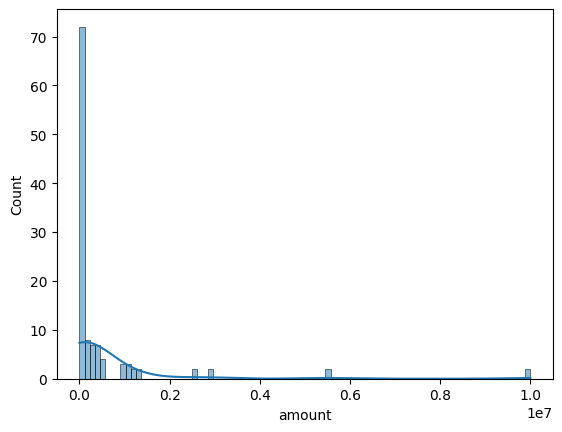

In [ ]:
fraud = df[df['isFraud'] == 1]
sns.histplot(fraud['amount'],kde=True)

from the above graph, we can see frauds occur when the amount is low

In [ ]:
df["type"].value_counts()

,count
type,
PAYMENT,39512
CASH_OUT,30718
CASH_IN,20185
TRANSFER,8597
DEBIT,988


<Axes: xlabel='type', ylabel='count'>

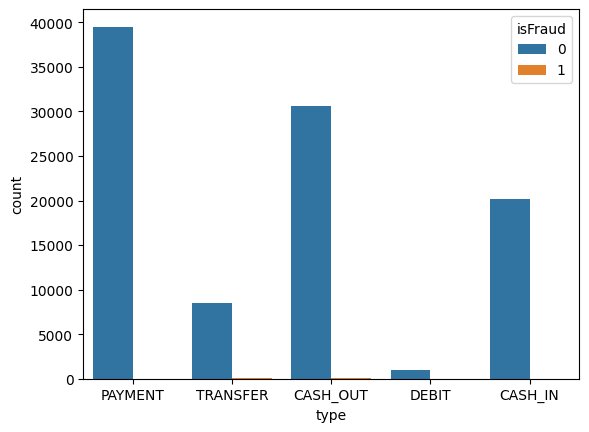

In [ ]:
sns.countplot(df, x="type", hue="isFraud")

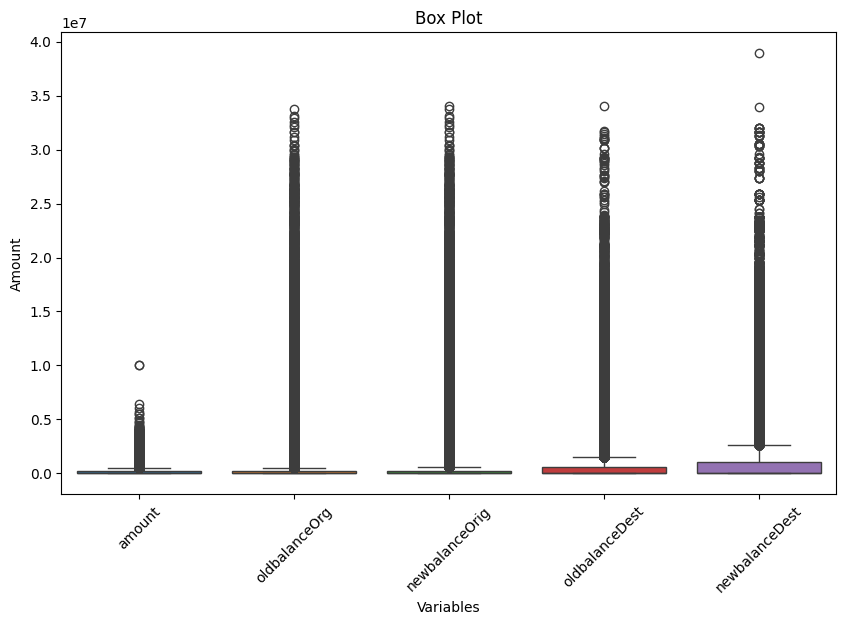

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.title('Box Plot')
plt.xlabel('Variables')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Old Balance Origin')

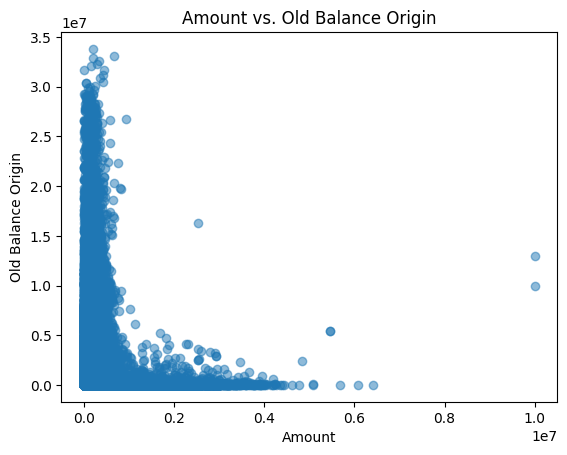

In [ ]:
plt.scatter(df['amount'], df['oldbalanceOrg'], alpha=0.5)
plt.title('Amount vs. Old Balance Origin')
plt.xlabel('Amount')
plt.ylabel('Old Balance Origin')

Text(0, 0.5, 'Amount')

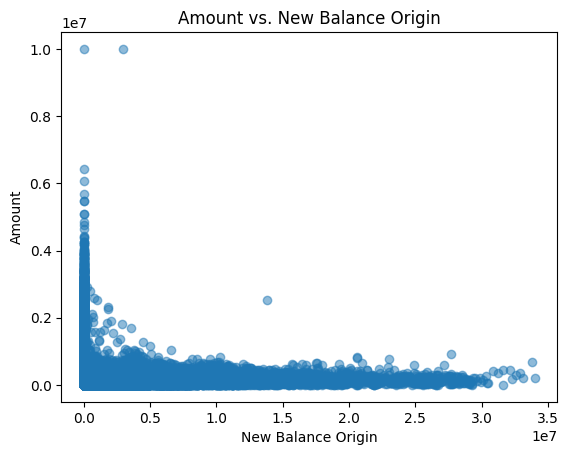

In [ ]:
plt.scatter(df['newbalanceOrig'], df['amount'], alpha=0.5)
plt.title('Amount vs. New Balance Origin')
plt.xlabel('New Balance Origin')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

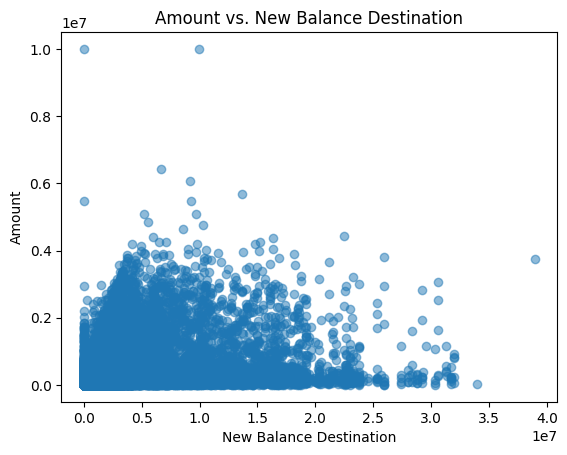

In [ ]:
plt.scatter(df['newbalanceDest'], df['amount'], alpha=0.5)
plt.title('Amount vs. New Balance Destination')
plt.xlabel('New Balance Destination')
plt.ylabel('Amount')

#**Handling Categorical Data**

##**Using OHE on Type column**

In [ ]:
types = pd.get_dummies(df['type'], prefix='type', drop_first=True)
types = types.astype(int)
types.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


##**Dropping** Columns

In [ ]:
df = df.drop(["nameOrig", "nameDest"],axis=1)

In [ ]:
df = pd.concat([df, types], axis=1)
df = df.drop('type', axis=1)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


##**Checking for Coorelation**

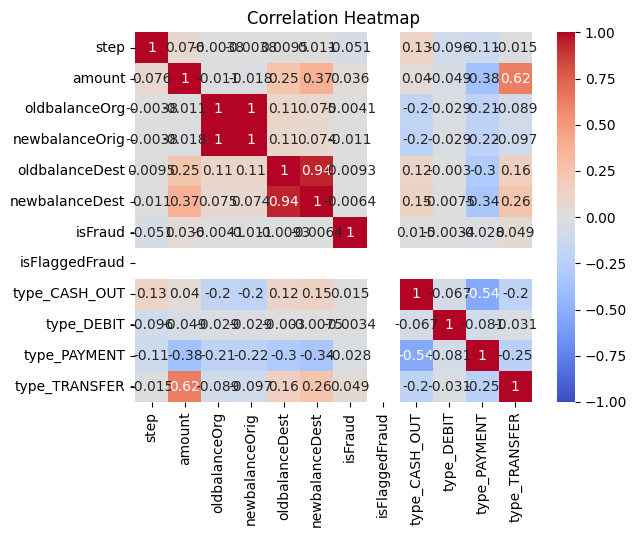

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

We can see oldbalanceorg and newbalanceorig & oldbalanceDest and newbalanceDest are highly colinear , to deal with them we can perform one of the following steps

1) add more data to reduce colinearity 2) remove one of the 2 corelated feature 3) Create a new variable that combines info of both corelated features 4) perform lasso or ridge regression 5) perform Principle Component Regression.

Here i have decided to Create a new variable that combines info of both corelated features

##**Droping one of the Coorelated Columns**

In [ ]:
df['balanceChangedest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Drop the original variables
df = df.drop(columns=['newbalanceDest', 'newbalanceDest'])

In [ ]:
df['balanceChange'] = df['newbalanceOrig'] - df['oldbalanceOrg']

# Drop the original variables
df = df.drop(columns=['oldbalanceOrg', 'newbalanceOrig'])

In [ ]:
# legitimateTransactions = df[df.isFraud  == 0]
# fraudTransactions = df[df.isFraud  == 1]

In [ ]:
# legitimateTransactions = legitimateTransactions.sample(119)
# df = pd.concat([legitimateTransactions,fraudTransactions],axis=0)
# df.head()


In [ ]:
# df.info()

#**Separating** X and Y

In [ ]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']

In [ ]:
X.head()

,step,amount,oldbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balanceChangedest,balanceChange
0,1,9839.64,0.0,0,0,0,1,0,0.0,-9839.64
1,1,1864.28,0.0,0,0,0,1,0,0.0,-1864.28
2,1,181.00,0.0,0,0,0,0,1,0.0,-181.00
3,1,181.00,21182.0,0,1,0,0,0,-21182.0,-181.00
4,1,11668.14,0.0,0,0,0,1,0,0.0,-11668.14


In [ ]:
y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(80000, 10)

In [ ]:
X_test.shape

(20000, 10)

In [ ]:
y_test.value_counts()

,count
isFraud,
0,19978
1,22


#Handling Imbalanced **Data**

In [ ]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)

In [ ]:
y_train_ada.value_counts()

,count
isFraud,
0,79906
1,79876


#**Using PYOD**

In [ ]:
!pip install pyod
import pyod

#**Model Training**

In [ ]:
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print

In [ ]:
# model_name = 'KNN'
# model = KNN()
# model.fit(X_train_smote)

In [ ]:
from pyod.models.iforest import IForest
model_name = 'IForest'
model = IForest()
model.fit(X_train)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [ ]:
# from pyod.models.ocsvm import OCSVM
# model_name = 'OCSVM'
# model = OCSVM()
# model.fit(X_train)

##**Model Prediction**

In [ ]:
y_train_pred = model.labels_  # Assign labels (0: inliers, 1: outliers)
y_train_scores = model.decision_scores_  # Outlier scores

In [ ]:
print(X_train_ada.columns)
print(X_test.columns)

Index(['step', 'amount', 'oldbalanceDest', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balanceChangedest',
       'balanceChange'],
      dtype='object')
Index(['step', 'amount', 'oldbalanceDest', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balanceChangedest',
       'balanceChange'],
      dtype='object')


In [ ]:

# Predict outliers on the test data
y_train_pred = model.predict(X_train_ada)
y_test_pred = model.predict(X_test)  # Predict outliers (0: inliers, 1: outliers
y_test_scores = model.decision_function(X_test)  # Outlier scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [ ]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
X_train_ada['outlier'] = y_train_pred
X_test['outlier'] = y_test_pred
X_test.head(1)


,step,amount,oldbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balanceChangedest,balanceChange,outlier
75721,10,367088.24,2312937.66,0,0,0,0,0,1524116.28,367088.24,0


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_test contains the true labels for the test set
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     19978
           1       0.01      0.64      0.01        22

    accuracy                           0.90     20000
   macro avg       0.50      0.77      0.48     20000
weighted avg       1.00      0.90      0.94     20000



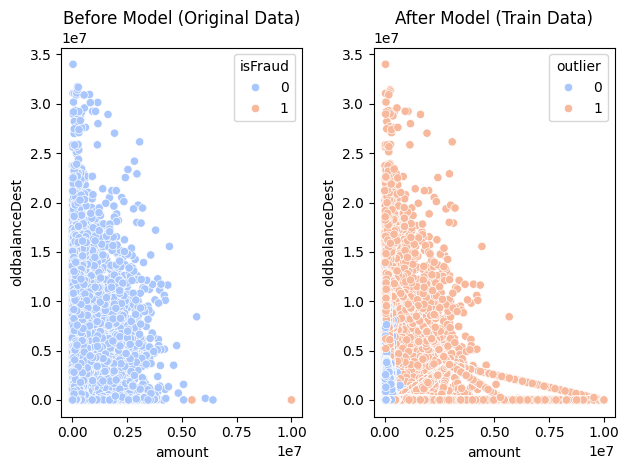

In [ ]:
# Before detection (assuming 'amount' vs 'oldbalanceDest')
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='amount', y='oldbalanceDest', hue='isFraud', palette="coolwarm")
plt.title('Before Model (Original Data)')

# After detection (on train)
plt.subplot(1, 2, 2)
sns.scatterplot(data=X_train_ada, x='amount', y='oldbalanceDest', hue='outlier', palette="coolwarm")
plt.title('After Model (Train Data)')


plt.tight_layout()
plt.show()


In [ ]:
import pickle

In [ ]:
# Saving the model
with open('fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(model, file)
